> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-Show-Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

>‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Question(s) to answer by this  Analysis
>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#we see how many Nan vluaes we have in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>We have no Nan values in our datset

In [5]:
#we try to figure out more information about our dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>Average patient age is 37 years

>The maximum age is 115 years

>the minimum age is -1 years since there's no age with negative valuse this not make any sense


In [6]:
# we going to find the number of rows and columns of the dataset 
df.shape

(110527, 14)

>The dataset have 110527 rows and 14 coulmns

In [7]:
#check for duplicated rows 
sum(df.duplicated())

0

In [8]:
#check if there's null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
df["PatientId"].nunique()

62299

we have 62299 unique values in patient ID out of 110527

In [10]:
#check for duplicated values in appointment ID 
sum(df.AppointmentID.duplicated())

0

In [11]:
#check for duplicated values in patient ID
sum(df.PatientId.duplicated())


48228

In [12]:
#check for repeated patient conditions 
df.duplicated(["PatientId","No-show"]).sum()

38710

we have 38710 patient with repeated show and No-show so we can drop them to make the data more accurate 

In [13]:
df["Age"].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

We have to drop less or equal zero ages

In [14]:
#it has to be two only values 
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [15]:
#it has to be two only values 

df["Scholarship"].unique()

array([0, 1])

In [16]:
#it has to be two only values 
df["Diabetes"].unique()

array([0, 1])

In [17]:
#it has to be two only values 
df["Hipertension"].unique()

array([1, 0])

### Data Cleaning
#### In this section we are trying to clean our dataset in order to get the most accurate insights 

In [18]:
# here we drop all the ages that are less than or equal 0 
df = df[df.Age > 0]
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


here we drop all the patients with age 0 and -1 sense there's no age equal to zero or negative 1 

In [19]:
#testing 
test=df.query("Age==-1")
test

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [20]:
df.drop_duplicates(["PatientId","No-show"],inplace=True)
df.shape

(69454, 14)

Now we clean our dataset a little bit 69454 out of110527

In [21]:
#here we rename No-show to No_show in order to make it easier in using methouds 
df.rename(columns={"No-show":"No_show"},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### Data Overview 

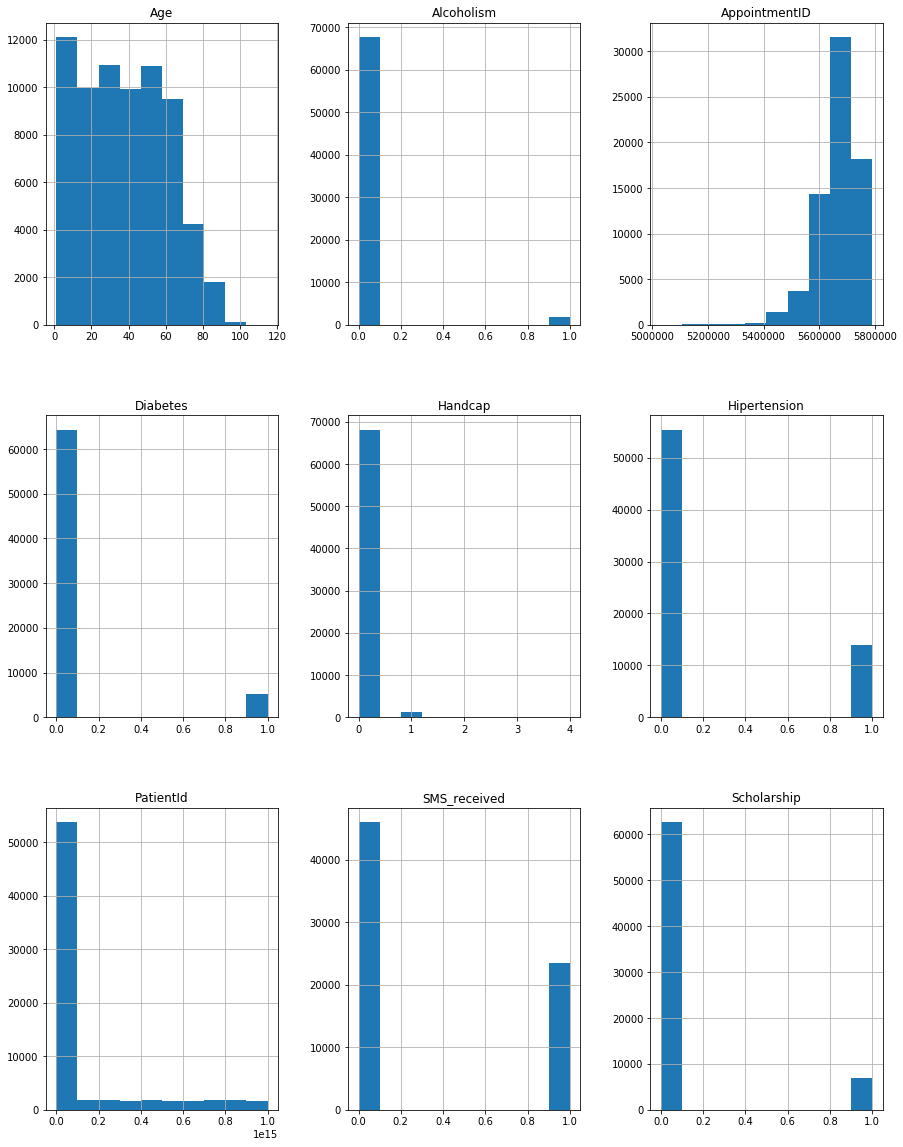

In [22]:
df.hist(figsize=(15,20));

>As we say before the average age of the patients is about 37 years

>Most of the patients don't drink alchohol

>Most of the patients don't suffer from diabetes or hypertention 

>We have a significant amount of patiens whoo didn't get the SMS

>About 10% of the join the Barazilian scohlarship

In [23]:
#lets divide the dataset into two dataframes one with "Show" patient and "No-Show" patient 
no_show =df["No_show"] == "Yes"
show =df["No_show"] == "No"

In [24]:
# we can also know the precentage of patinets who show to the no_show patients 
df[no_show].count()

PatientId         17094
AppointmentID     17094
Gender            17094
ScheduledDay      17094
AppointmentDay    17094
Age               17094
Neighbourhood     17094
Scholarship       17094
Hipertension      17094
Diabetes          17094
Alcoholism        17094
Handcap           17094
SMS_received      17094
No_show           17094
dtype: int64

the number of patients that didn't come are 22319

In [25]:
df[show].count()

PatientId         52360
AppointmentID     52360
Gender            52360
ScheduledDay      52360
AppointmentDay    52360
Age               52360
Neighbourhood     52360
Scholarship       52360
Hipertension      52360
Diabetes          52360
Alcoholism        52360
Handcap           52360
SMS_received      52360
No_show           52360
dtype: int64

the number of patients that come are 88208
>25% of patients didn't show up 

## Age in relation with show and no-show appointments

In [26]:
df.Age[show].mean()

38.504698242933536

In [27]:
df.Age[no_show].mean()

35.52076752076752

the mean average of patients who shows in appointments is about 38 years and who didn't show is about 34 years , so the mean doesn't tell us that much 

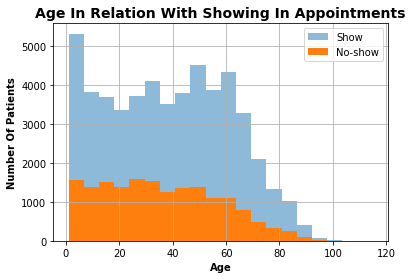

In [28]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.Age[show].hist(alpha=0.5,bins=20,label="Show")
df.Age[no_show].hist(bins=20,label="No-show")
plt.legend();
plt.title('Age in relation with showing in appointments'.title(),
               fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel('Age'.title(),
               fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel('Number of patients'.title(),
               fontsize = 10, weight = "bold");


As we see there's  a specific relation between age and show in appoinments but the data is skewed to the right 
>It turns out when people grow older they don't theme to show up in appoinments

>The highest precentage of patients who show are in age 0-20 years 

#### Here we make a function to aviod repeated code , so we can apply it in all parameters that affect showing or not showing in appointments

In [29]:
# my_plot take dataframe "dataset" , the variable on x axis like ("gender" , "sms recieved") , the colors of th as an input 
def my_plot(df,x_var,normalize=True,color=['black','red']):
    
    mul=1
    if normalize:
        mul=100
    df.groupby([x_var])['No_show'].value_counts(normalize=normalize).unstack("No_show").mul(mul).plot.bar(edgecolor ='black',
                                                                                                       figsize=[14,8],
                                                                                                       rot=0,
                                                                                                       width=0.8,
                                                                                                       color=color);
    plt.title(f"precentage of show / no_show {x_var}".title(),fontsize=14 ,weight="bold")
    plt.xlabel(x_var.title(),fontsize=10,weight="bold")
    plt.ylabel('precentage'.title(),fontsize=10,weight="bold")
    

## Gender in relation with show and no-show appointments

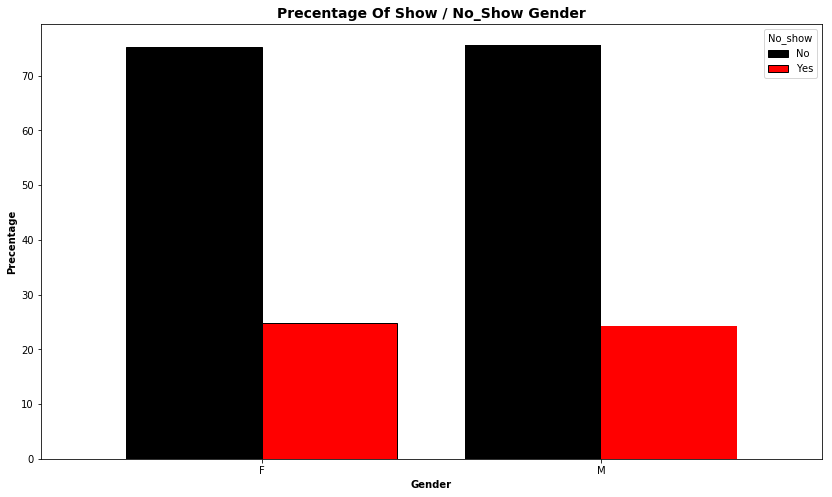

In [30]:
my_plot(df,"Gender",normalize='Flase')

The graph show that the number of females is larger than number of males ,but it doesn't affect the show and no-show operation 

In [31]:
df.groupby('Gender').No_show.value_counts(normalize=False).unstack("Gender")

Gender,F,M
No_show,,
No,34106,18254
Yes,11226,5868


The number of of females who show in appointments is about twice males

### Scholarship in relation with the show and no-show appointments

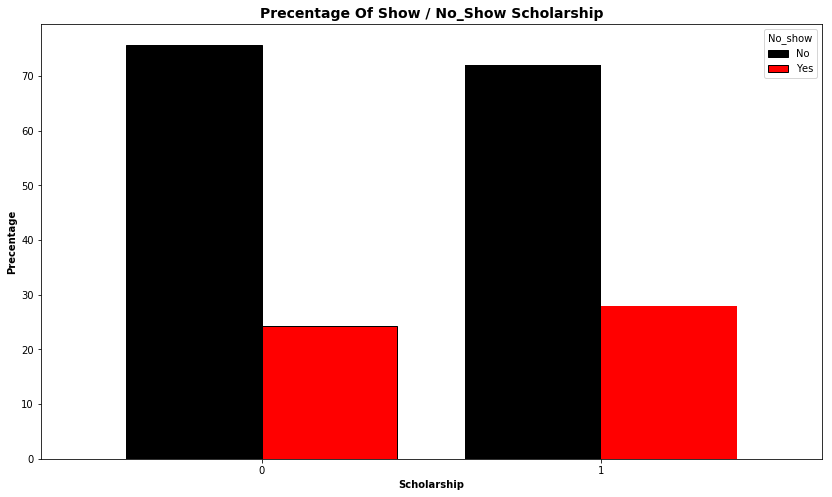

In [32]:
my_plot(df,"Scholarship",normalize='Flase')

In [33]:
#find the number of patients who have scholarships 
df.groupby('Scholarship').No_show.value_counts(normalize=False).unstack('Scholarship')

Scholarship,0,1
No_show,,
No,47443,4917
Yes,15186,1908


the number of patients who show in appointments who have scholarships is only 10% of the total patients without scholarships

###  Hypertension in relation with the show and no-show appointments

Text(0,0.5,'Number Of Patients')

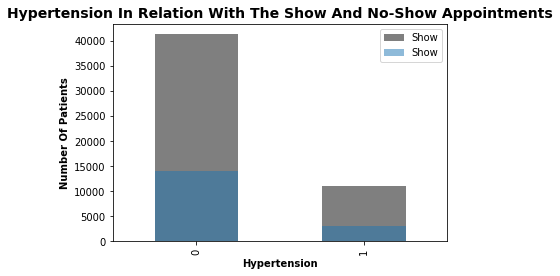

In [34]:
df.Hipertension[show].value_counts().plot(kind="bar",alpha=0.5,label="Show",color="black")
df.Hipertension[no_show].value_counts().plot(kind="bar",alpha=0.5,label="Show")
plt.legend();
plt.title('Hypertension in relation with the show and no-show appointments'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Hypertension'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Number of patients'.title(),
               fontsize = 10, weight = "bold")

There's no segnificant relation between hypertension and showing in appoinments 

the number of patients who show in appointments who have hypertension is only 25% of the total patients without hypertension

###  Diabetes in relation with the show and no-show appointments

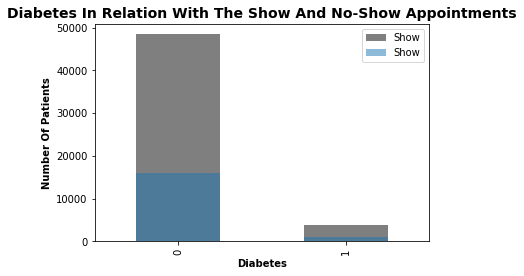

In [35]:
df.Diabetes[show].value_counts().plot(kind="bar",alpha=0.5,label="Show",color="black")
df.Diabetes[no_show].value_counts().plot(kind="bar",alpha=0.5,label="Show")
plt.legend();

plt.title('Diabetes in relation with the show and no-show appointments'.title(),
               fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel('Diabetes'.title(),
               fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel('Number of patients'.title(),
               fontsize = 10, weight = "bold");

There's no segnificant relation between diabetes and showing in appoinments 

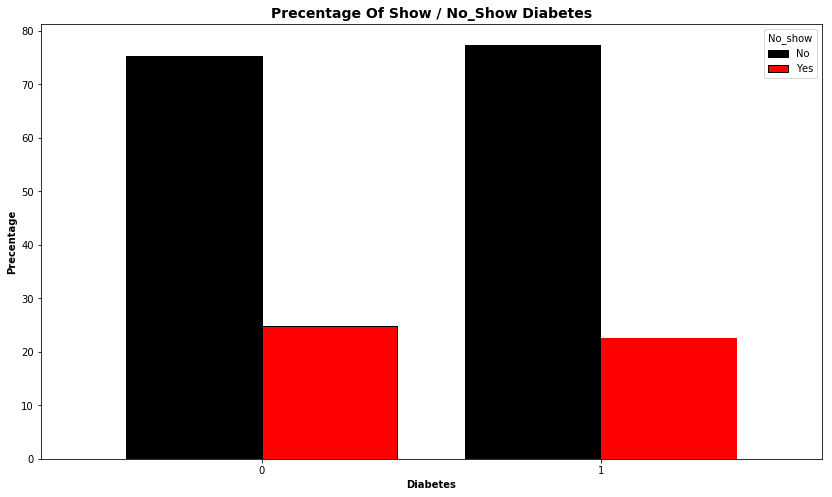

In [36]:
my_plot(df,"Diabetes",normalize='Flase')

the number of patients who show in appointments who have diabetes is only 7.9% of the total patients without diabetes

###  Alcoholism in relation with the show and no-show appointments

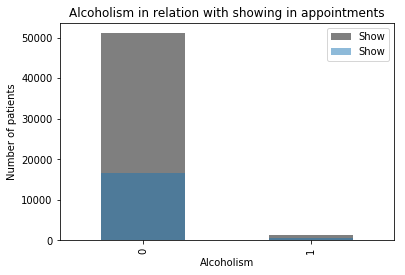

In [37]:
df.Alcoholism[show].value_counts().plot(kind="bar",alpha=0.5,label="Show",color="black")
df.Alcoholism[no_show].value_counts().plot(kind="bar",alpha=0.5,label="Show")
plt.legend();
plt.title("Alcoholism in relation with showing in appointments");
plt.xlabel("Alcoholism");
plt.ylabel("Number of patients");

There's no significant relation between Alcoholism and showing in appoinments 

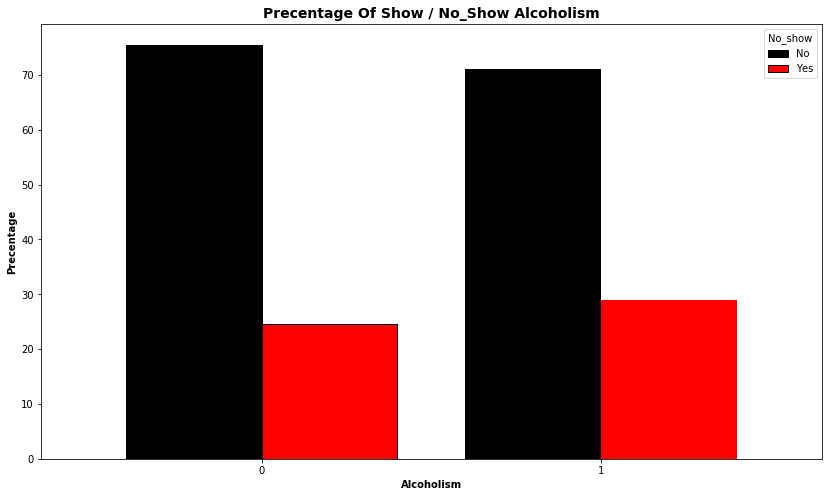

In [38]:
my_plot(df,"Alcoholism",normalize='Flase')

the number of patients who show in appointments who drink Alcohol is only 3% of the total patients without Alcoholism

###  Handcap in relation with the show and no-show appointments

Text(0,0.5,'Number of patients')

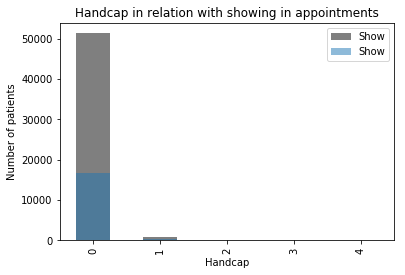

In [39]:
df.Handcap[show].value_counts().plot(kind="bar",alpha=0.5,label="Show",color="black")
df.Handcap[no_show].value_counts().plot(kind="bar",alpha=0.5,label="Show")
plt.legend();
plt.title("Handcap in relation with showing in appointments")
plt.xlabel("Handcap")
plt.ylabel("Number of patients")

There's no significant relation between Handcap and showing in appoinments 

###  SMS_received in relation with the show and no-show appointments

Text(0,0.5,'Number of patients')

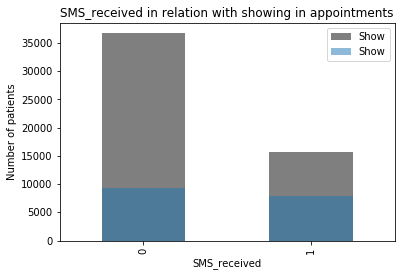

In [40]:
df.SMS_received[show].value_counts().plot(kind="bar",alpha=0.5,label="Show",color="black")
df.SMS_received[no_show].value_counts().plot(kind="bar",alpha=0.5,label="Show")
plt.legend();
plt.title("SMS_received in relation with showing in appointments")
plt.xlabel("SMS_received")
plt.ylabel("Number of patients")


There's no significant relation between Alcoholism and showing in appoinments , but it turns out that patients who didn't recevie the message show more in appointments 

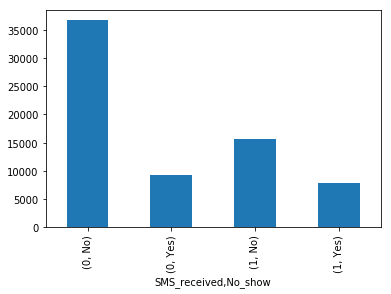

In [41]:
df.groupby('SMS_received').No_show.value_counts().plot(kind="bar")

the number of patients who show in appointments who recieve the sms  is only 40% of the total patients without sms , it seems like tge SMS isn't ecouraging enough

### Neighbourhood  in relation with the show and no-show appointments

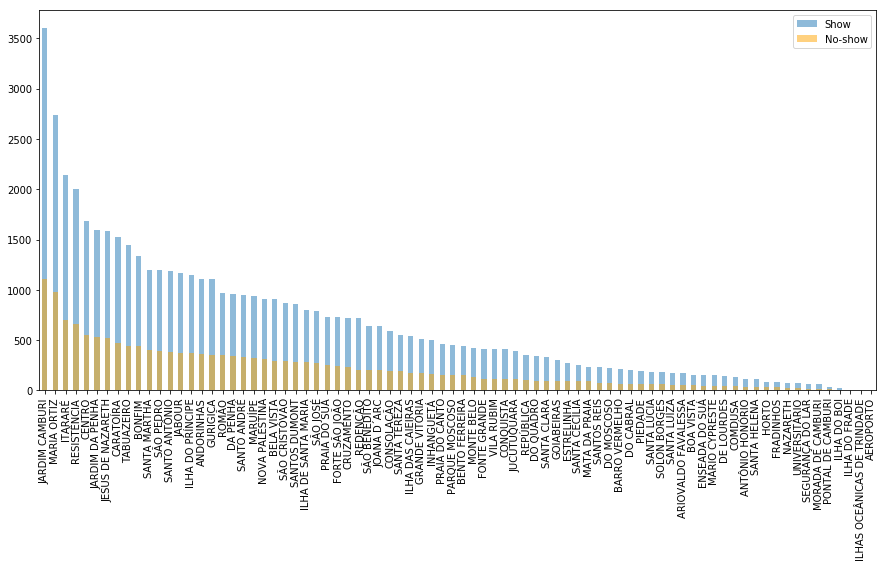

In [42]:
plt.figure(figsize=[15,7])
df.Neighbourhood[show].value_counts().plot(kind ='bar',alpha=0.5,label="Show")
df.Neighbourhood[no_show].value_counts().plot(kind ='bar',alpha=0.5,label="No-show",color="orange")
plt.legend();


there is significant relation between neighbourhood and showing in appointments as we seee some areas have lager number of patients than others

<a id='conclusions'></a>
## Conclusions

>The highest precentage of patients who show are in age 0-20 years

>It turns out when people grow older they don't theme to show up in appoinments

>there is significant relation between neighbourhood and showing in appointments as we seee some areas have lager number of patients than others 

>JARDIM CAMBURI city have more than 6000 patients who show in appointment 

>AEROPORTO city have the minimum number of patients

>he number of patients who show in appointments who recieve the sms  is only 40% of the total patients without sms , it seems like tge SMS isn't ecouraging enough


### Limitations

>I don't feel like there's a specific reason behind not showing in appointments Age seems realstic before i do the anaylsis and the neighbourhood can be like stakeholders don't focus in that specific area 

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0